In [0]:
# 資料取得

from keras.datasets import mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
print("訓練資料量：", train_data.shape[0])
print("測試資料量：", test_data.shape[0])

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
訓練資料量： 60000
測試資料量： 10000


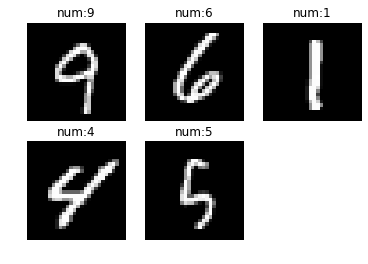

In [0]:
# 資料隨機顯示

import matplotlib.pyplot as plt
import numpy as np
rand_num_img = np.random.randint(0,60000,size=5)

for (idx, i) in enumerate(rand_num_img):  
  plt.subplot(2, 3, idx+1)
  plt.title("num:"+ str(train_label[i]))
  plt.axis("off")
  plt.imshow(train_data[i], cmap="gray")

In [0]:
print("訓練資料維度：", train_data.shape)

# 還沒有one hot encoding 
print("訓練資料答案維度：", train_label.shape)

訓練資料維度： (60000, 28, 28)
訓練資料答案維度： (60000,)


In [0]:
# 資料處理
# 資料向量化(1D張量)
# 資料正規化

train_data_reshape = train_data.reshape(60000, 784)
test_data_reshape = test_data.reshape(10000, 784)
train_data_reshape = train_data_reshape / 255
test_data_reshape = test_data_reshape / 255

In [0]:
# 答案處理
# 答案向量化(one-hot encoding)

from keras.utils.np_utils import to_categorical
train_label_cat = to_categorical(train_label)
test_label_cat = to_categorical(test_label)

train_label.shape, test_label.shape

((60000,), (10000,))

In [0]:
# 模型建立

from keras.models import Sequential
from keras.layers import Dense,Dropout

MLP = Sequential()

MLP.add(Dense(256, activation='relu', input_shape=(784,)))
MLP.add(Dropout(0.25))
MLP.add(Dense(128, activation='relu'))
MLP.add(Dropout(0.25))
MLP.add(Dense(10, activation='softmax'))

MLP.summary()

W0801 23:09:36.577977 140111749080960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 23:09:36.614272 140111749080960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 23:09:36.619868 140111749080960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 23:09:36.636631 140111749080960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 23:09:36.649599 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 模型確立

MLP.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

W0801 23:09:36.718068 140111749080960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 23:09:36.751154 140111749080960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# 訓練模型

train_history = MLP.fit(train_data_reshape, train_label_cat, batch_size=200, epochs=10, verbose=1, validation_split=0.2)

W0801 23:09:36.876270 140111749080960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.4617 - acc: 0.8622 - val_loss: 0.1661 - val_acc: 0.9516
Epoch 2/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.1864 - acc: 0.9456 - val_loss: 0.1178 - val_acc: 0.9633
Epoch 3/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.1362 - acc: 0.9590 - val_loss: 0.1049 - val_acc: 0.9678
Epoch 4/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.1089 - acc: 0.9668 - val_loss: 0.0875 - val_acc: 0.9731
Epoch 5/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.0872 - acc: 0.9737 - val_loss: 0.0848 - val_acc: 0.9745
Epoch 6/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.0775 - acc: 0.9766 - val_loss: 0.0821 - val_acc: 0.9759
Epoch 7/10
48000/48000 [==============================] - 1s 24us/step - loss: 0.0670 - acc: 0.9791 - val_loss: 0.0775 - val_ac

In [0]:
# 訓練出來的結果以圖表顯示

def show_train_history(train_history, train, validation):
  plt.figure()
# 共用X軸的寫法(只放數值)
# 放(X，Y)則是用點分布畫線
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(str(train_history))
  plt.xlabel("epoch")
  plt.ylabel("train")
  plt.legend(["train","validation"])
  plt.show

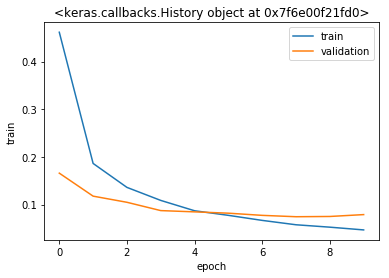

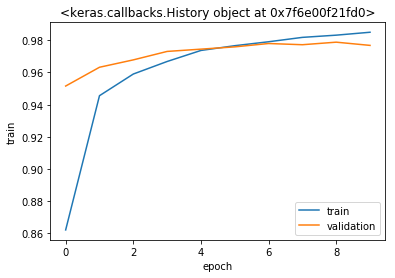

In [0]:
show_train_history(train_history,"loss","val_loss")
show_train_history(train_history,"acc","val_acc")

In [0]:
# 資料計算

MLP.evaluate(test_data_reshape, test_label_cat)

10000/10000 [==============================] - 0s 43us/step


[0.07414900975972415, 0.9781]

In [0]:
# 測試圖片預測值
predict_consequence = MLP.predict(test_data_reshape) # (10000, 10)
predict_answer = []
for i in predict_consequence:
  predict_answer.append(i.argmax())

predict_answer_array = np.array(predict_answer)
predict_answer_array

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
# 找出不相等的索引
error_img_idx = test_label != predict_answer_array
error_img_idx = np.nonzero(error_img_idx)[0]
error_img_idx.shape

(219,)

In [0]:
# 定義查找圖片的函式
# 功能是顯示正確與預測值並繪製出來

def search_img(index, database, answer_database):
  for (idx, i) in enumerate(index):  
    plt.subplot(2, 3, idx+1)
    plt.title("num:"+ str(answer_database[i]))
    plt.axis("off")
    plt.imshow(database[i], cmap="gray")

In [0]:
# error_img_idx => 不相等測試資料庫索引
# 預期錯誤結果顯示

def predict_result(width, error_img_idx, img_width, img_height, test_label_array, predict_answer_array):

  width = width
  height = int(error_img_idx.shape[0] / width)+1
  plt.figure(figsize=(img_width, img_height))

  for (idx, i) in enumerate(error_img_idx):
    predict_error_img_right_label = test_label_array[i]
    predict_error_img_error_label = predict_answer_array[i]
    plt.subplot(height, width, idx+1)
    plt.title("[O]:"+str(predict_error_img_right_label)+"[P]:"+str(predict_error_img_error_label))
    plt.axis("off")
    plt.imshow(test_data[i], cmap="gray")

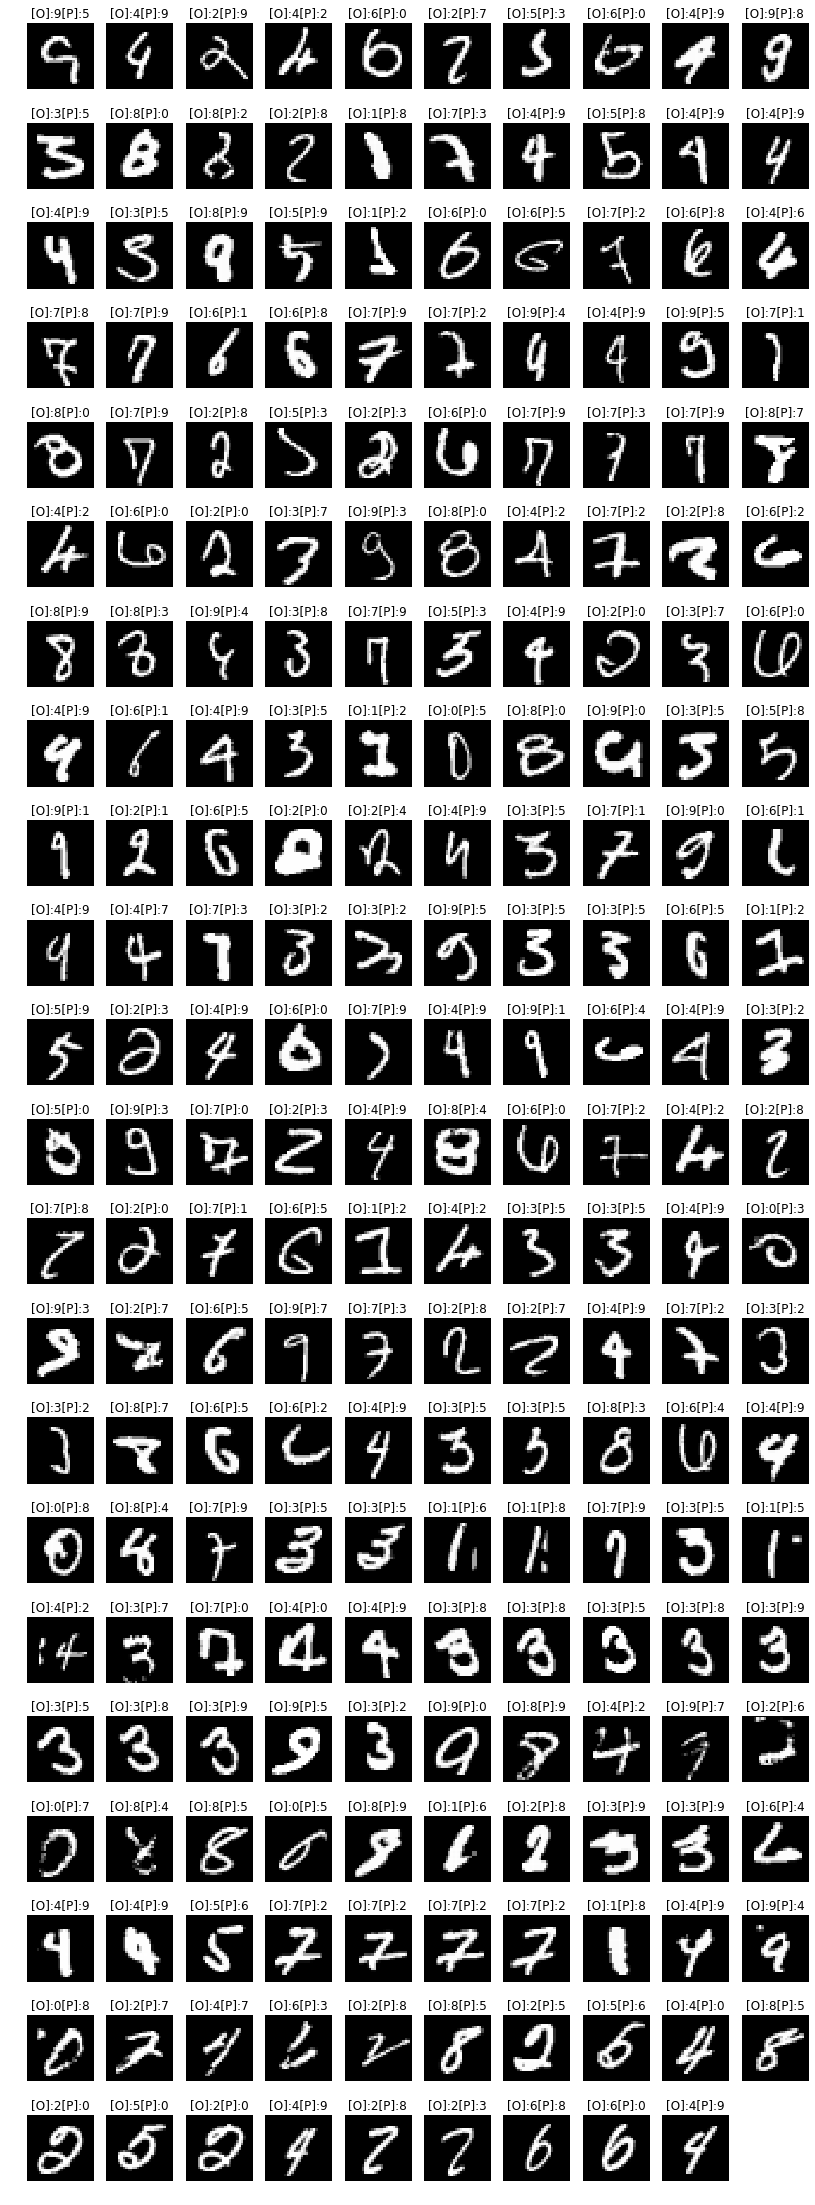

In [0]:
predict_result(10,error_img_idx,14,40,test_label,predict_answer_array)